# Major Project on Image Classification

#### About the DataSet:
I will be using the CelebA dataset (which is widley used dataset of celebrity faces) in this entire project to train the Coventional machine learning models as well as deep learning models inorder to predict the hair colour (can be brown, black, blond, gray) of the celebrity. 

#### Project Flow: 
This Jupyter Notebook is divided in to 5 sections, where the first four sections uses conventional Machine learning models for predicting the hair colour ,the next two sections uses Deep learning models for predicting the hair colour and there is a result field at the end of each section which evalvuates the models performance on the data.
###### Conventional Machine Learning Models: 
The Machine learning models that are used in this section are:
1. Random Forest Classifier
2. Naive Base Clasifier
3. Support Vector Machine (SVM) Classifier

A parameter tuning has done For Random Forest and SVM to find the best model that fits the data perfectly.

###### Deep Learning MOdels:
The Models that are used in this section are:
1. Conventional Neural Network:

A hyper parameter tuning has done on the CNN.

## ----------------------------------------------------Section - 1-----------------------------------------------------------
###                              1) Coventional Machine Learning Model - Random Forest Classifier

##### Observations From preliminary data Exploration:
so we can see that images_train contains a list of size 98479 with 48 features as height for each picture, 48 features as width for each picture and a 3 channel (RGB) colour sclae for each picture (with values raning from 1 to 255). This results in 48*48*3 = 6912 features to work with.

##### Train_Images data:  
we now have the trian data in the form which is accepted by all Machine learning Models (which is 98479, 6912). we can use either the x coming from reshape() or xx coming from ravel() for training the model as they both return the same result in the desired form. we do not need to reshape labels_train because it contains single column with 98479 values.

##### Observations From preliminary data Exploration:
so we can see that images_val contains a list of size 12270 with 48 features as height for each picture, 48 features as width for each picture and a 3 channel (RGB) colour sclae for each picture (with values raning from 1 to 255). This results in 48*48*3 = 6912 features to work with.


##### Val_Images data:  
we now have the validation data in the form which is accepted by all Machine learning Models (which is 12270, 6912). we can use y coming from reshape() for validating the model. we do not need to reshape labels_val because it contains single column with 12270 values.


### Model Fitting: 
we now have the Train_images in variable x, Val_images in y, labels_train, labels_val, so we can go further to fit the model using the training data and validate the model using the validation data. 

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

Accuracy score for validation is: 0.7973920130399348
Confusion matrix for validation is: [[3573   55  372    7]
 [  20 2479  313   40]
 [ 867  311 3302   27]
 [  56  275  143  430]]


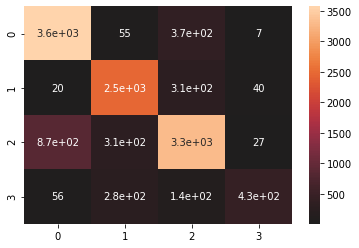

In [21]:
# Runnig Random Forest on default parameters
model = RandomForestClassifier(random_state = 26)
model = model.fit(x, labels_train)
y_pred = model.predict(y)
print("Accuracy score for validation is:",accuracy_score(labels_val, y_pred))
Def_Accu = accuracy_score(labels_val, y_pred)
cm = confusion_matrix(labels_val, y_pred)
print("Confusion matrix for validation is:", cm)
sns.heatmap(cm,annot = True , center=True)
plt.show()

### Result Interpretation for Random Forest with Default Parameters:
1. Accuracy Score on the Validation data is 79%, which can be bad some times due to the fact that random forests tend to overfit the data when there is no constraint on max_depth because, when no depth value is mentioned it takes unlimited no of depths that are required to build a deeper tree with several splits one for each feature and captures more informatin about the data. with this behaviour they perform well on the training data but not on the new data.

2. From the confusion Matrix we can see that:
   
   a) The Model predicts the class 1 3573 times but misclassifeis 55 times as class 2, 372 times as class 3 and 7 times as class 4.
   
   b) The Model predicts the class 2 2479 times but misclassifeis 20 times as class 1, 313 times as class 3 and 40 times as class 4.
   
   c) The Model predicts the class 3 3302 times but misclassifeis 867 times as class 1, 311 times as class 2 and 27 times as class 4.
   
   d) The Model predicts the class 4 4303 times but misclassifeis 56 times as class 1, 275 times as class 2 and 143 times as class 3.

#### Parameter Tuning For Random Forest: 
Since, Random Forest tends to overfit when no parameters are controlled, so I will be looking at the models performance for a range of estimators and depth to find which parameters are providing better results and which parameters leading to overfit the data.

In [26]:
# Fitting the model for several Estimators rangiing from 25
Estimators = [25,50,100,150,200, 500]
Train_Acc_Score = []
Valid_Acc_Score = []
for e in Estimators:
    model = RandomForestClassifier(n_estimators = e, random_state = 26)
    model = model.fit(x, labels_train)
    Val_pred = model.predict(y)
    Val_Score = accuracy_score(labels_val, Val_pred)
    Valid_Acc_Score.append(Val_Score)
    print("Accuracy score with "+str(e)+" estimators for validation is:",Val_Score)
    Train_pred = model.predict(x)
    Train_Score = accuracy_score(labels_train, Train_pred)
    Train_Acc_Score.append(Train_Score)
    print("Accuracy score with "+str(e)+" estimators for train is:",Train_Score)

Accuracy score with 25 estimators for validation is: 0.7801140994295028
Accuracy score with 25 estimators for train is: 0.99936026970217
Accuracy score with 50 estimators for validation is: 0.7918500407497963
Accuracy score with 50 estimators for train is: 0.9999695366524843
Accuracy score with 100 estimators for validation is: 0.7973920130399348
Accuracy score with 100 estimators for train is: 1.0
Accuracy score with 150 estimators for validation is: 0.799918500407498
Accuracy score with 150 estimators for train is: 1.0
Accuracy score with 200 estimators for validation is: 0.8008149959250204
Accuracy score with 200 estimators for train is: 1.0
Accuracy score with 500 estimators for validation is: 0.8011409942950285
Accuracy score with 500 estimators for train is: 1.0


In [27]:
print(Train_Acc_Score)
print(Valid_Acc_Score)

[0.99936026970217, 0.9999695366524843, 1.0, 1.0, 1.0, 1.0]
[0.7801140994295028, 0.7918500407497963, 0.7973920130399348, 0.799918500407498, 0.8008149959250204, 0.8011409942950285]


#### Accuracy Scores Interpretation based on estimator tuning: 
since we are controlling only estimators but not depth, we can see that Model tends to overfit the data as the accuracy scores for the traing sets for the given estimators is way better than the accuracy scores of Validation set. Meaning the model is overfiting and soes not perform well on new data. so now we look at a range of small estimators instead of large estimators.  

In [28]:
Estimators1 = [1, 2, 3, 4, 5, 10, 15, 20]
Train_Acc_Score1 = []
Valid_Acc_Score1 = []
for e in Estimators1:
    model = RandomForestClassifier(n_estimators = e, random_state = 26)
    model = model.fit(x, labels_train)
    Val_pred = model.predict(y)
    Val_Score = accuracy_score(labels_val, Val_pred)
    Valid_Acc_Score1.append(Val_Score)
    print("Accuracy score with "+str(e)+" estimators for validation is:",Val_Score)
    Train_pred = model.predict(x)
    Train_Score = accuracy_score(labels_train, Train_pred)
    Train_Acc_Score1.append(Train_Score)
    print("Accuracy score with "+str(e)+" estimators for train is:",Train_Score)

Accuracy score with 1 estimators for validation is: 0.6211898940505297
Accuracy score with 1 estimators for train is: 0.8667736268646107
Accuracy score with 2 estimators for validation is: 0.6246128769356153
Accuracy score with 2 estimators for train is: 0.8714040556869993
Accuracy score with 3 estimators for validation is: 0.680521597392013
Accuracy score with 3 estimators for train is: 0.9444856263771971
Accuracy score with 4 estimators for validation is: 0.6986960065199674
Accuracy score with 4 estimators for train is: 0.9540308085987875
Accuracy score with 5 estimators for validation is: 0.715158924205379
Accuracy score with 5 estimators for train is: 0.9730094741010774
Accuracy score with 10 estimators for validation is: 0.7489812550937245
Accuracy score with 10 estimators for train is: 0.9919475218066796
Accuracy score with 15 estimators for validation is: 0.7654441727791361
Accuracy score with 15 estimators for train is: 0.9975324688512271
Accuracy score with 20 estimators for v

In [29]:
print(Train_Acc_Score1)
print(Valid_Acc_Score1)

[0.8667736268646107, 0.8714040556869993, 0.9444856263771971, 0.9540308085987875, 0.9730094741010774, 0.9919475218066796, 0.9975324688512271, 0.9985783771159333]
[0.6211898940505297, 0.6246128769356153, 0.680521597392013, 0.6986960065199674, 0.715158924205379, 0.7489812550937245, 0.7654441727791361, 0.7756316218418908]


In [31]:
# joining the accuracy score of traing and validation for all no of estimators.
Train_Accuracy = Train_Acc_Score1 + Train_Acc_Score
Validation_Accuracy = Valid_Acc_Score1 + Valid_Acc_Score
No_of_Estimators = Estimators1 + Estimators

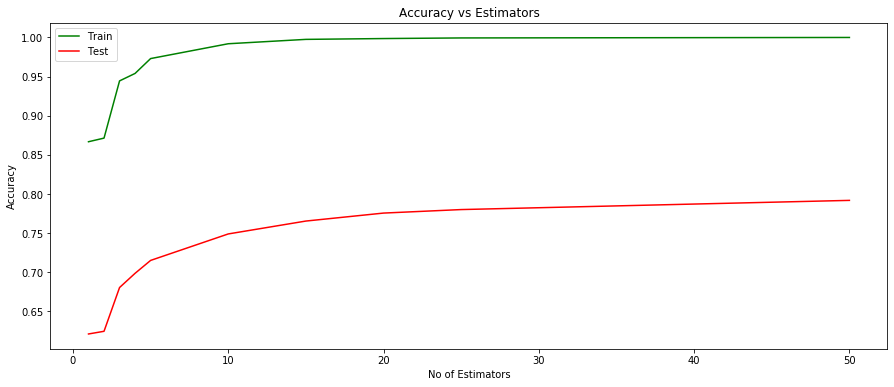

In [40]:
# plotting the accuracy score of traning and validation vs Estimators 
plt.figure(figsize=(15,6))
plt.plot(No_of_Estimators[:10], Train_Accuracy[:10],label = "Train", color='g')
plt.plot(No_of_Estimators[:10], Validation_Accuracy[:10], label = "Test", color='r')
plt.ylabel("Accuracy")
plt.xlabel("No of Estimators")
plt.title("Accuracy vs Estimators")
plt.legend()

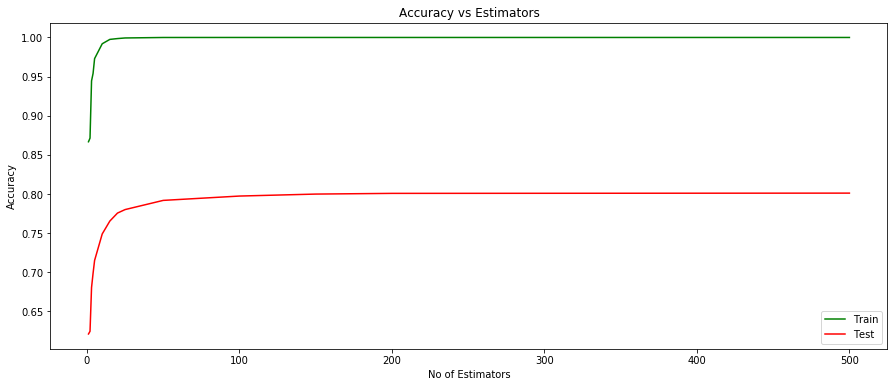

In [41]:
plt.figure(figsize=(15,6))
plt.plot(No_of_Estimators, Train_Accuracy,label = "Train", color='g')
plt.plot(No_of_Estimators, Validation_Accuracy, label = "Test", color='r')
plt.ylabel("Accuracy")
plt.xlabel("No of Estimators")
plt.title("Accuracy vs Estimators")
plt.legend()

#### Accuracy Scores Interpretation based on estimator tuning: 
From the above plots, we can see that Model tends to perform well for estimors within the range 10 and 20, above that will result in poor performance. Further more we look at model performace at various depths:

In [42]:
# Depth Parameter tuning
# fitting the model at different depths
Depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Train_Acc_Score2 = []
Valid_Acc_Score2 = []
for e in Depth:
    model = RandomForestClassifier(max_depth = e, random_state = 26)
    model = model.fit(x, labels_train)
    Val_pred = model.predict(y)
    Val_Score = accuracy_score(labels_val, Val_pred)
    Valid_Acc_Score2.append(Val_Score)
    print("Accuracy score with "+str(e)+" depth for validation is:",Val_Score)
    Train_pred = model.predict(x)
    Train_Score = accuracy_score(labels_train, Train_pred)
    Train_Acc_Score2.append(Train_Score)
    print("Accuracy score with "+str(e)+" depth for train is:",Train_Score)

Accuracy score with 1 depth for validation is: 0.5785656071719641
Accuracy score with 1 depth for train is: 0.6214218259730501
Accuracy score with 2 depth for validation is: 0.6687041564792175
Accuracy score with 2 depth for train is: 0.6926755958123052
Accuracy score with 3 depth for validation is: 0.6925020374898125
Accuracy score with 3 depth for train is: 0.709846769361996
Accuracy score with 4 depth for validation is: 0.7039934800325999
Accuracy score with 4 depth for train is: 0.7201433808223073
Accuracy score with 5 depth for validation is: 0.7269763651181744
Accuracy score with 5 depth for train is: 0.7420668365844495
Accuracy score with 6 depth for validation is: 0.7414832925835371
Accuracy score with 6 depth for train is: 0.7572680469947908
Accuracy score with 7 depth for validation is: 0.7509372453137735
Accuracy score with 7 depth for train is: 0.7732714588897125
Accuracy score with 8 depth for validation is: 0.7622656886715566
Accuracy score with 8 depth for train is: 0.79

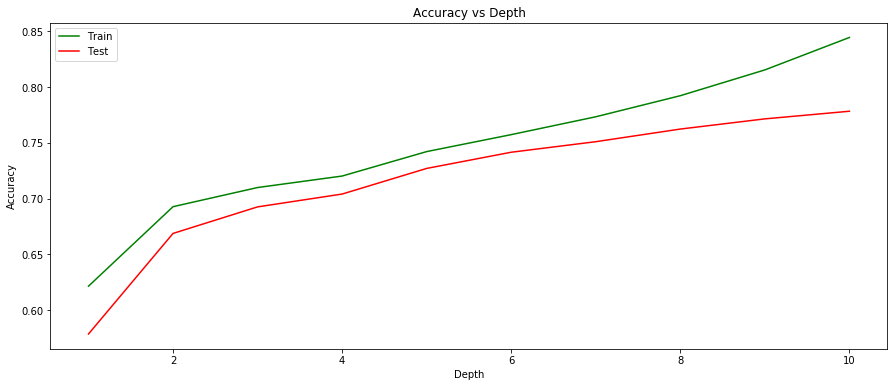

In [44]:
plt.figure(figsize=(15,6))
plt.plot(Depth, Train_Acc_Score2,label = "Train", color='g')
plt.plot(Depth, Valid_Acc_Score2, label = "Test", color='r')
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.title("Accuracy vs Depth")
plt.legend()

#### Accuracy Scores Interpretation based on Depth tuning: 
since we are controlling depth, we can see that Model is not overfitting since the accuracy score difference between training and validation is not differing by too much. After the Depth 10 the model seems not to perform as beeter as depth at 10.  

#### Fitting the several random forest models with a combination of final choosen Estimator and Depth parameter values:
1. Model 1 with n_estimators = 3, max_depth = 5 
2. Model 2 with n_estimators = 3, max_depth = 6
3. Model 3 with n_estimators = 10, max_depth = 5
4. Model 4 with n_estimators = 10, max_depth = 6
5. Model 5 with n_estimators = 15, max_depth = 5
6. Model 6 with n_estimators = 15, max_depth = 6

In [53]:
Models = [1, 2, 3, 4, 5, 6]
Train_Acc_Score3 = []
Valid_Acc_Score3 = []

In [54]:
# Model 1 with n_estimators = 3, max_depth = 5
model = RandomForestClassifier(n_estimators = 3, max_depth = 5, random_state = 26)
model = model.fit(x, labels_train)
Val_pred = model.predict(y)
Val_Score = accuracy_score(labels_val, Val_pred)
Valid_Acc_Score3.append(Val_Score)
print("Accuracy score with 3 estimators and 2 depth for validation is:",Val_Score)
Train_pred = model.predict(x)
Train_Score = accuracy_score(labels_train, Train_pred)
Train_Acc_Score3.append(Train_Score)
print("Accuracy score with 3 estimators and 2 depth for train is:",Train_Score)


Accuracy score with 3 estimators and 2 depth for validation is: 0.6916055419722902
Accuracy score with 3 estimators and 2 depth for train is: 0.7084149920287574


In [55]:
# Model 2 with n_estimators = 3, max_depth = 6
model = RandomForestClassifier(n_estimators = 3, max_depth = 6, random_state = 26)
model = model.fit(x, labels_train)
Val_pred = model.predict(y)
Val_Score = accuracy_score(labels_val, Val_pred)
Valid_Acc_Score3.append(Val_Score)
print("Accuracy score with 3 estimators and 2 depth for validation is:",Val_Score)
Train_pred = model.predict(x)
Train_Score = accuracy_score(labels_train, Train_pred)
Train_Acc_Score3.append(Train_Score)
print("Accuracy score with 3 estimators and 2 depth for train is:",Train_Score)

Accuracy score with 3 estimators and 2 depth for validation is: 0.710839445802771
Accuracy score with 3 estimators and 2 depth for train is: 0.7231795611247068


In [57]:
# Model 3 with n_estimators = 10, max_depth = 5
model = RandomForestClassifier(n_estimators = 10, max_depth = 5, random_state = 26)
model = model.fit(x, labels_train)
Val_pred = model.predict(y)
Val_Score = accuracy_score(labels_val, Val_pred)
Valid_Acc_Score3.append(Val_Score)
print("Accuracy score with 3 estimators and 2 depth for validation is:",Val_Score)
Train_pred = model.predict(x)
Train_Score = accuracy_score(labels_train, Train_pred)
Train_Acc_Score3.append(Train_Score)
print("Accuracy score with 3 estimators and 2 depth for train is:",Train_Score)

Accuracy score with 3 estimators and 2 depth for validation is: 0.7162999185004075
Accuracy score with 3 estimators and 2 depth for train is: 0.7306836990627443


In [58]:
# Model 4 with n_estimators = 10, max_depth = 6
model = RandomForestClassifier(n_estimators = 10, max_depth = 6, random_state = 26)
model = model.fit(x, labels_train)
Val_pred = model.predict(y)
Val_Score = accuracy_score(labels_val, Val_pred)
Valid_Acc_Score3.append(Val_Score)
print("Accuracy score with 3 estimators and 2 depth for validation is:",Val_Score)
Train_pred = model.predict(x)
Train_Score = accuracy_score(labels_train, Train_pred)
Train_Acc_Score3.append(Train_Score)
print("Accuracy score with 3 estimators and 2 depth for train is:",Train_Score)

Accuracy score with 3 estimators and 2 depth for validation is: 0.7329258353708231
Accuracy score with 3 estimators and 2 depth for train is: 0.7477330192223722


In [59]:
# Model 5 with n_estimators = 15, max_depth = 5
model = RandomForestClassifier(n_estimators = 15, max_depth = 5, random_state = 26)
model = model.fit(x, labels_train)
Val_pred = model.predict(y)
Val_Score = accuracy_score(labels_val, Val_pred)
Valid_Acc_Score3.append(Val_Score)
print("Accuracy score with 3 estimators and 2 depth for validation is:",Val_Score)
Train_pred = model.predict(x)
Train_Score = accuracy_score(labels_train, Train_pred)
Train_Acc_Score3.append(Train_Score)
print("Accuracy score with 3 estimators and 2 depth for train is:",Train_Score)

Accuracy score with 3 estimators and 2 depth for validation is: 0.7207823960880195
Accuracy score with 3 estimators and 2 depth for train is: 0.7336487982209405


In [60]:
# Model 6 with n_estimators = 15, max_depth = 6
model = RandomForestClassifier(n_estimators = 15, max_depth = 6, random_state = 26)
model = model.fit(x, labels_train)
Val_pred = model.predict(y)
Val_Score = accuracy_score(labels_val, Val_pred)
Valid_Acc_Score3.append(Val_Score)
print("Accuracy score with 3 estimators and 2 depth for validation is:",Val_Score)
Train_pred = model.predict(x)
Train_Score = accuracy_score(labels_train, Train_pred)
Train_Acc_Score3.append(Train_Score)
print("Accuracy score with 3 estimators and 2 depth for train is:",Train_Score)

Accuracy score with 3 estimators and 2 depth for validation is: 0.7352078239608802
Accuracy score with 3 estimators and 2 depth for train is: 0.7501599325744575


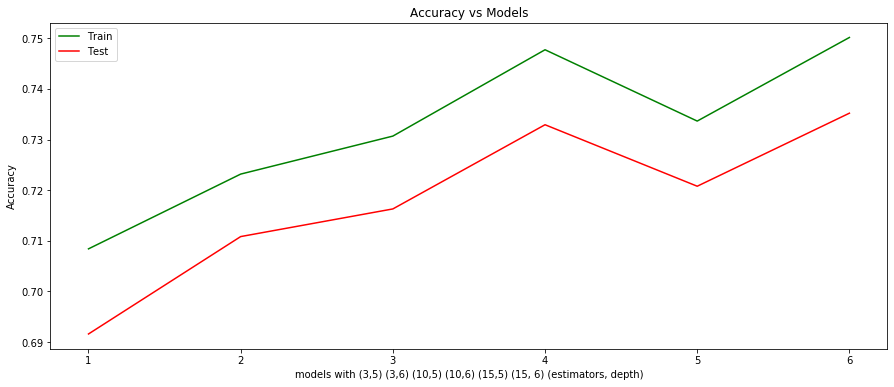

In [61]:
plt.figure(figsize=(15,6))
plt.plot(Models, Train_Acc_Score3,label = "Train", color='g')
plt.plot(Models, Valid_Acc_Score3, label = "Test", color='r')
plt.ylabel("Accuracy")
plt.xlabel("models with (3,5) (3,6) (10,5) (10,6) (15,5) (15, 6) (estimators, depth)")
plt.title("Accuracy vs Models")
plt.legend()

 #### Best Model Selection based on the Accuracy scores:
 From the plot as well as accuracy scores of individual Models we can see that model 4, 5 is performing better when compared to other models. so we use Model 4 to predict the Test Data
 
 Model Selected would be a Random Forest with Depth 6 and Estimators 10 for predicting.

In [70]:
# reading the test data files
images_test_public = np.load(join(dataset_directory, 'test_public_images.npy'))
files_test_public = np.load(join(dataset_directory, 'test_public_files.npy'))
images_test_public_rs = images_test_public.reshape([-1, image_size, image_size, 3]) / 255.0 # normalizing the data

##### Observations From preliminary data Exploration:
so we can see that images_test contains a list of size 11921 with 48 features as height for each picture, 48 features as width for each picture and a 3 channel (RGB) colour sclae for each picture (with values raning from 1 to 255). This results in 48*48*3 = 6912 features to work with.

In [ ]:
Features3 = images_test_public_rs.shape[1]*images_test_public_rs.shape[2]*images_test_public_rs.shape[3]
Features3

In [74]:
lst4 = [None] * images_test_public_rs.shape[0] # creating an empty array of size 98479
for i in range(images_test_public_rs.shape[0]):
    lst4[i] = images_test_public_rs[i].reshape([-1]) # reshaping each picture to 6912 features and storing it in lst1
#print(lst)
z = np.array(lst4).reshape(images_test_public_rs.shape[0],Features3) # converting the list to an array
print(z.shape)

(11921, 6912)


##### Test_Images data:  
we now have the test data in the form which is accepted by all Machine learning Models (which is 11921, 6912). we can use this for predicting the model.

In [75]:
# Final Model For Fitting 
model = RandomForestClassifier(n_estimators = 10, max_depth = 6, random_state = 26)
model = model.fit(x, labels_train)
Test_Public_pred = model.predict(z)

In [79]:
Test_Public_pred

array([0, 2, 0, ..., 0, 0, 1], dtype=int64)

In [84]:
files_test_public # displaying the content stored 

array(['182639.jpg', '182640.jpg', '182642.jpg', ..., '202597.jpg',
       '202598.jpg', '202599.jpg'], dtype='<U10')

In [88]:
Test_Public_pred_copy = Test_Public_pred # making a copy of the Predicted values for safety

In [89]:
Test_Public_pred_copy

array([0, 2, 0, ..., 0, 0, 1], dtype=int64)

In [107]:
# creating a data frame for predicted values
df1 = pd.DataFrame(Test_Public_pred_copy, columns=['Prediction'])
df1.tail()

,Prediction
11916,1
11917,2
11918,0
11919,0
11920,1


In [108]:
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_public, columns=['ID'])
df2.tail()

,ID
11916,202595.jpg
11917,202596.jpg
11918,202597.jpg
11919,202598.jpg
11920,202599.jpg


In [109]:
# Joining the two data frames through the index
Test_Public_pred_Acc_testpurpose_45693242 = df2.merge(df1, left_index=True, right_index=True)

In [110]:
Test_Public_pred_Acc_testpurpose_45693242.head() # first five

,ID,Prediction
0,182639.jpg,0
1,182640.jpg,2
2,182642.jpg,0
3,182643.jpg,0
4,182644.jpg,0


In [111]:
Test_Public_pred_Acc_testpurpose_45693242.tail() # Last five

,ID,Prediction
11916,202595.jpg,1
11917,202596.jpg,2
11918,202597.jpg,0
11919,202598.jpg,0
11920,202599.jpg,1


In [112]:
Test_Public_pred_Acc_testpurpose_45693242.to_csv (r'C:\\Users\\suhas\\Downloads\\ML Practice\\Test_Public_pred_Acc_testpurpose_45693242.csv', index = False, header=True)